In [67]:
using Plots
using SparseArrays
using LinearAlgebra
using Arpack

plotlyjs()

Plots.PlotlyJSBackend()

In [68]:
E = 2.e5
A = 1
l = 100
k = A * E / l
ρ = 8.e-9
m = ρ * A * l

n = 100
dof = n + 1

101

In [69]:
K = zeros(dof, dof)
for i in 1:n
    K[i:i+1, i:i+1] += [k -k
        -k k]
end
K

101×101 Matrix{Float64}:
  2000.0  -2000.0      0.0      0.0  …      0.0      0.0      0.0      0.0
 -2000.0   4000.0  -2000.0      0.0         0.0      0.0      0.0      0.0
     0.0  -2000.0   4000.0  -2000.0         0.0      0.0      0.0      0.0
     0.0      0.0  -2000.0   4000.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0  -2000.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0  …      0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     ⋮                               ⋱                                 ⋮
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
  

In [70]:
M = zeros(dof, dof)
for i in 1:n
    M[i:i+1, i:i+1] += [m/2 0
        0 m/2]
end
M

101×101 Matrix{Float64}:
 4.0e-7  0.0     0.0     0.0     0.0     …  0.0     0.0     0.0     0.0
 0.0     8.0e-7  0.0     0.0     0.0        0.0     0.0     0.0     0.0
 0.0     0.0     8.0e-7  0.0     0.0        0.0     0.0     0.0     0.0
 0.0     0.0     0.0     8.0e-7  0.0        0.0     0.0     0.0     0.0
 0.0     0.0     0.0     0.0     8.0e-7     0.0     0.0     0.0     0.0
 0.0     0.0     0.0     0.0     0.0     …  0.0     0.0     0.0     0.0
 0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
 0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
 0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
 0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
 ⋮                                       ⋱                          ⋮
 0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
 0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
 0.0     0.0     0.0     0.0     0.0     

In [71]:
#ω², ϕ = Arpack.eigs(K, M, nev=1, which=:LM)
ω², ϕ = eigen(K, M)

#err = norm(K * ϕ[:,1] - ω²[1] * M * ϕ[:,1]) / norm(K * ϕ[:,1])
#if err > 1e-3 # || true
#    error("Túl nagy a hiba a legnagyobb sajátérték számításánál: $err")
#end
T = 2π ./ .√(real.(abs.(ω²)))
Tₘᵢₙ = last(T)

6.283185307179587e-5

In [72]:
l / √(E / ρ)

2.0e-5

In [73]:
ξₘₐₓ = [0.1, 0.01, 0.001, 0.0003, 0.00008, 0.0002, 0.01, 0.005, 0.003]
#ξₘₐₓ = [0.001]

9-element Vector{Float64}:
 0.1
 0.01
 0.001
 0.0003
 8.0e-5
 0.0002
 0.01
 0.005
 0.003

In [74]:
β = zeros(length(ξₘₐₓ))
for i in 1:length(ξₘₐₓ)
    β[i] = 2ξₘₐₓ[i] / (2π / Tₘᵢₙ)^(2 * i - 1)
end
invM = spdiagm(1 ./ diag(M))
C = zeros(dof, dof)
MK = copy(K)
iMK = invM * K
for i in 1:length(β)
    C += β[i] * MK #u1, v1, t1 = FEM.CDM(K, M, C, f, u0, v0, 100Tₘᵢₙ, Tₘᵢₙ / π)
    MK *= iMK
end
display(C)

101×101 Matrix{Float64}:
  0.00462739   -0.00496985    0.00047715   …   0.0           0.0
 -0.00496985    0.00973193   -0.00516119       0.0           0.0
  0.00047715   -0.00516119    0.00932906       0.0           0.0
 -0.000191347   0.000551431  -0.00499128       0.0           0.0
  7.42803e-5   -0.000212779   0.000481484      0.0           0.0
 -2.14319e-5    7.86143e-5   -0.00019192   …   0.0           0.0
  4.33398e-6   -2.20051e-5    7.43254e-5       0.0           0.0
 -5.7312e-7     4.37915e-6   -2.14338e-5       0.0           0.0
  4.5166e-8    -5.74951e-7    4.33398e-6       0.0           0.0
 -1.83105e-9    4.5166e-8    -5.7312e-7        0.0           0.0
  ⋮                                        ⋱                 ⋮
  0.0           0.0           0.0             -5.74951e-7    4.5166e-8
  0.0           0.0           0.0              4.37915e-6   -5.7312e-7
  0.0           0.0           0.0             -2.20051e-5    4.33398e-6
  0.0           0.0           0.0          …   7

In [75]:
O = zeros(dof, dof)
A = [I O
    O -M]
B = [O I
    K C]

202×202 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 ⋮                        ⋮                   ⋱   ⋮            
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -5.74951e-7    4.5166e-8
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      4.37915e-6   -5.7312e-7
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  -2.20051e-5    4.33398e-6
 0.0  0.

In [76]:
λ, ϕ = eigen(collect(B), collect(A), sortby=abs)
a = [abs.(λ) -real.(λ) ./ abs.(λ)]
#λ

202×2 Matrix{Float64}:
      0.000375912  4.66616e-6
      0.000375912  4.66616e-6
   1570.73         0.00157077
   1570.73         0.00157077
   3141.08         0.00314139
   3141.08         0.00314139
   4710.65         0.00471169
   4710.65         0.00471169
   6279.05         0.00628153
   6279.05         0.00628153
      ⋮            
  99802.7          0.128805
  99889.0          0.129143
  99889.0          0.129143
  99950.7          0.129385
  99950.7          0.129385
  99987.7          0.129531
  99987.7          0.129531
 100000.0          0.12958
 100000.0          0.12958

In [77]:
b = a[3:2:2dof, :]

100×2 Matrix{Float64}:
   1570.73  0.00157077
   3141.08  0.00314139
   4710.65  0.00471169
   6279.05  0.00628153
   7845.91  0.00785074
   9410.83  0.00941917
  10973.4   0.0109867
  12533.3   0.012553
  14090.1   0.0141182
  15643.4   0.0156818
      ⋮     
  99211.5   0.126564
  99396.1   0.127252
  99556.2   0.127857
  99691.7   0.128376
  99802.7   0.128805
  99889.0   0.129143
  99950.7   0.129385
  99987.7   0.129531
 100000.0   0.12958

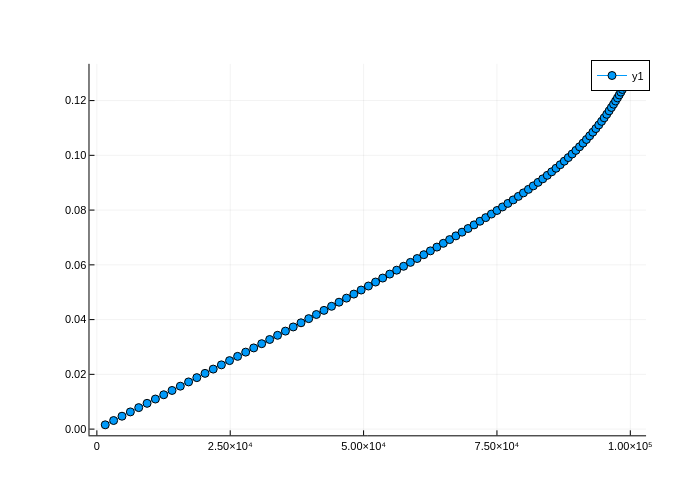

In [78]:
plot(b[:, 1], b[:, 2], shape=:auto)

100-element Vector{Float64}:
 0.0012712934276063734
 0.0006347274484987054
 0.0004225745707227649
 0.0003165249172980132
 0.0002529165203887624
 0.00021052873039244642
 0.00018026698866774232
 0.000157584020768852
 0.00013995356750036095
 0.0001258598773437544
 ⋮
 1.7768376238028877e-5
 1.772328054006805e-5
 1.768415874199097e-5
 1.7651025475475337e-5
 1.7623894655296156e-5
 1.7602778748622657e-5
 1.7587688104043454e-5
 1.757863052268463e-5
 1.7575610776002427e-5

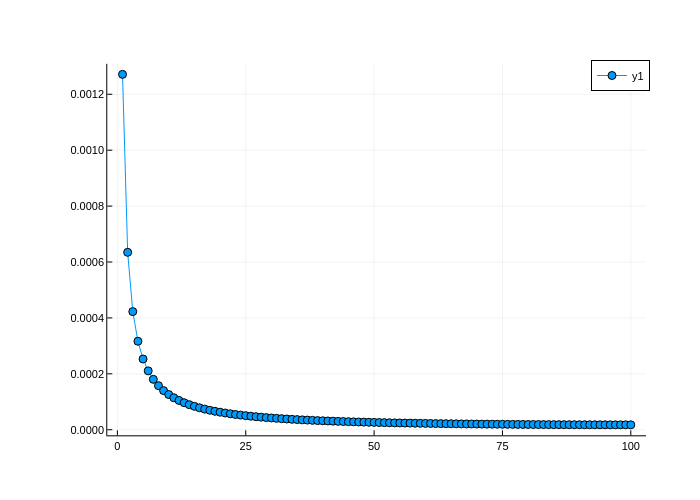

In [79]:
c = zeros(length(b[:, 2]))
for i in 1:length(b[:, 2])
    c[i] = (2 / b[i, 1]) * (sqrt(1 + b[i, 2]^2) - b[i, 2])
end
display(c)
plot(c, shape=:auto)


In [80]:
Δt = minimum(c) * 0.98
#Δt = last(c)
n = 1000

ω = range(first(b[:, 1]), length=n, stop=last(b[:, 1]))
ω = b[:, 1]
x = zeros(length(ω))
y = similar(x)
for i ∈ 1:length(ω)
    ξ = 0
    for j in 1:length(β)
        ξ += β[j] / 2 * ω[i]^(2j - 1)
    end
    Ω = Δt * ω[i]
    A = [2-2ξ*Ω-Ω^2 2ξ*Ω-1
        1 0]

    eig = eigen(A)
    ρ, idx = findmax(abs, eig.values)
    λ = eig.values[idx]
    σ = real(λ)
    ε = imag(λ)
    x[i] = Δt * ω[i] / 2π
    Ω0 = √((log(ρ))^2 + (atan(ε, σ))^2 / 4)
    #x[i] = Ω0 / Δt
    y[i] = -log(ρ) / 2Ω0
end

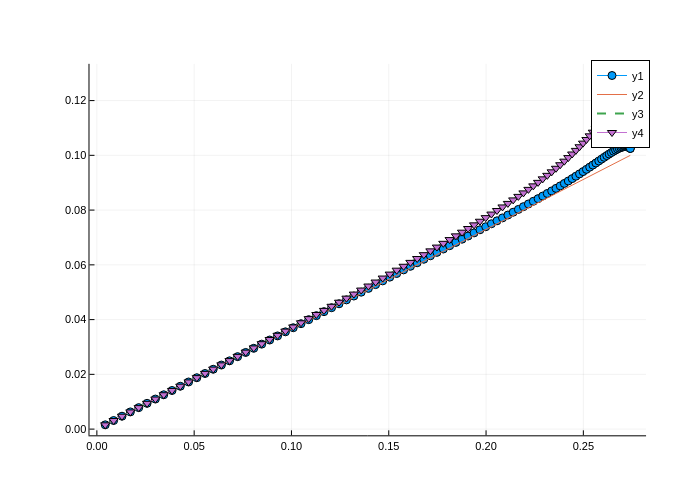

In [81]:
#plt = FEM.RayleighDampingAccuracyAnalysis(Tₘᵢₙ / √(1 - (1.5ξₘₐₓ)^2)^1, Tₘᵢₙ / π * (√(1 + (1.5ξₘₐₓ)^2) - 1.5ξₘₐₓ)^1, "dampingCharacter", n=1000, ξₘₐₓ=ξₘₐₓ, show_β=true)

plot(x, y, shape=:auto)
plot!(x, ξₘₐₓ[1] / last(x) * x)
z = zeros(length(x))
for i in 1:length(β)
    z += β[i] / 2 * (2π * x / Δt) .^ (2i - 1)
end
plot!(x, z, lw=2, ls=:dash)
#plot!(x, ξₘₐₓ / last(x) * x + ξₘₐₓ / 2 / last(x)^3 * x .^ 3)
plot!(Δt * b[:, 1] / 2π, b[:, 2], shape=:auto)
